In [1]:
import pandas as pd

df = pd.read_csv("Campus Recruitment.csv")
df.head()


,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv("Campus Recruitment.csv")
df.head()


,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                215 non-null    int64  
 1   Jenis Kelamin                     214 non-null    object 
 2   Nilai rata-rata SMP               213 non-null    float64
 3   Lembaga pendidikan kelas 10       215 non-null    object 
 4   Nilai rata-rata SMA               214 non-null    float64
 5   Lembaga pendidikan kelas 12       215 non-null    object 
 6   Jurusan saat SMA                  215 non-null    object 
 7   IPK                               215 non-null    float64
 8   Program studi sarjana             215 non-null    object 
 9   Pengalaman kerja sebelum lulus    215 non-null    object 
 10  Nilai tes kemampuan kerja         209 non-null    float64
 11  Pendidikan pascasarjana           215 non-null    object 
 12  Nilai ra

,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


In [5]:
df.rename(columns={'status kelulusan (Bekerja/Belum)': 'Placement'}, inplace=True)

df['Placement'] = df['Placement'].map({
    'Placed': 1,
    'Not Placed': 0
})

df.drop(['ID', 'Gaji'], axis=1, inplace=True)

df.fillna(df.mean(numeric_only=True), inplace=True)


In [6]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


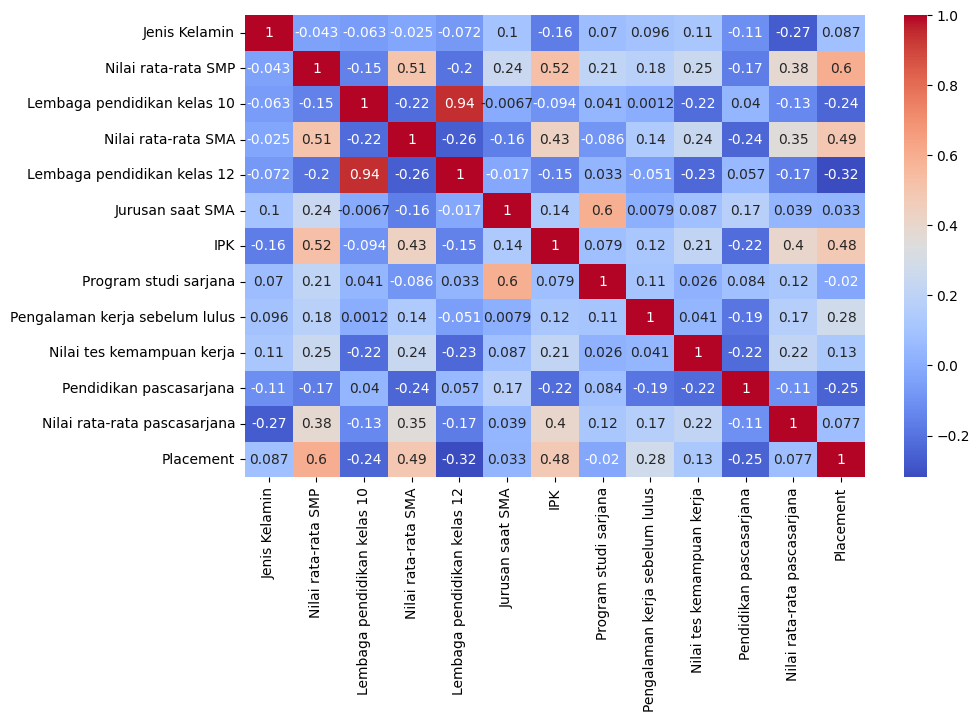

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [8]:
X = df.drop("Placement", axis=1)
y = df["Placement"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



In [10]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7906976744186046
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.82      0.90      0.86        31

    accuracy                           0.79        43
   macro avg       0.75      0.70      0.72        43
weighted avg       0.78      0.79      0.78        43



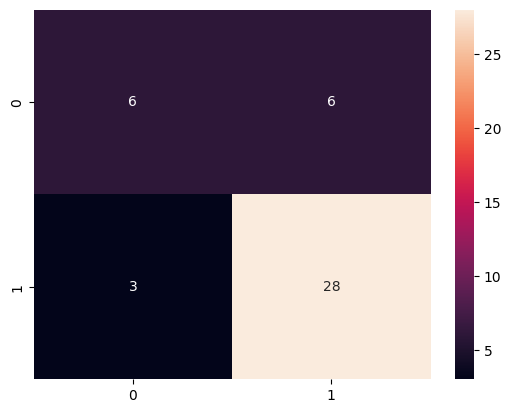

In [11]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d')
plt.show()


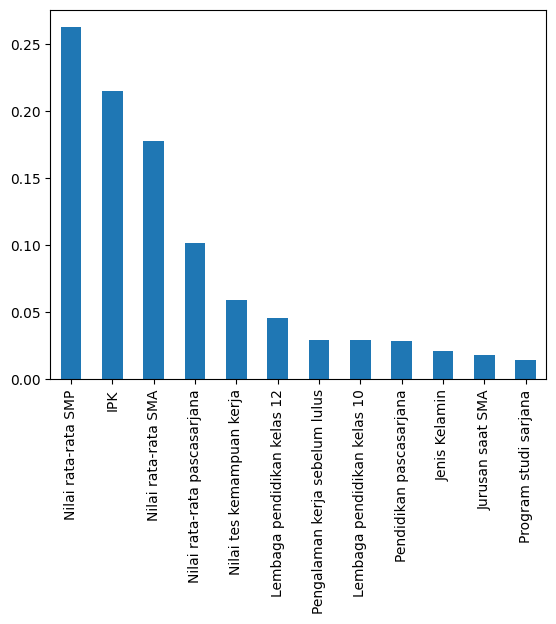

In [12]:
importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.plot(kind='bar')
plt.show()
